# **Introduction à l'apprentissage en profondeur**

<img src="https://incubator.ucf.edu/wp-content/uploads/2023/07/artificial-intelligence-new-technology-science-futuristic-abstract-human-brain-ai-technology-cpu-central-processor-unit-chipset-big-data-machine-learning-cyber-mind-domination-generative-ai-scaled-1-1500x1000.jpg" width="600"/>


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/practicals/ML_Foundation/Part_1/French_Introduction_to_Deep_Learning.ipynb" cible = "_ Parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt = "ouvrir en colab"/></a>

© Deep Learning Indaba 2025. Licence Apache 2.0.

**Auteurs:** Amel Sellami, Ulrich A. Mbou Sob, Tinuade Adeleke, Geraud Nangue Tasse, Kale-ab Tessera, Ismaïla Seck

**Réviseur:** Rym Oualha

**Introduction:**

Dans ce tutoriel, nous explorerons les concepts fondamentaux qui constituent les bases de l'apprentissage en profondeur. Nous apprendrons à construire et à entraîner des modèles d'apprentissage en profondeur (DL) à partir de zéro, uniquement à l'aide de NumPy. Nous conclurons ensuite en montrant comment entraîner efficacement des modèles plus grands en utilisant des outils DL spécialisés tels que JAX.

**Sujets:**

Contenu: <font color='green'> `Calcul numérique`</font>, <font color='orange'>`Apprentissage supervisé`</font>
Niveau: <font Color='Gray'>`Debutant`</font>


**Objectifs:**

- Comprendre les concepts de base de l'apprentissage automatique, y compris les données, les modèles et le processus d'apprentissage.
- Obtenir un aperçu des terminologies clés de l'apprentissage automatique moderne.
- Apprendre à mettre en œuvre et à entraîner des modèles d'apprentissage en profondeur à l'aide de NumPy.
- Apprendre à entraîner des modèles plus grands à l'aide de JAX.

**Prérequis:**

- Connaissance de base de [Numpy](https://github.com/numpy/numpy).
- Connaissance de base de [Programmation fonctionnelle](https://en.wikipedia.org/wiki/Fonctional_Programming).

**Sommaire:**
> [Introduction à l'apprentissage en profondeur](#scrollto=7ub_wz6a88_e)

>> [Installation et importations](#ScrollTO=6EQHIG1ODQG0)

> [Partie 1 - Qu'est-ce que l'apprentissage automatique - 25 minutes ⏰](#ScrollTO=CMHBHAEYEN9T)

>> [💻Introduction et motivation](#scrollto=ouev4gwwen9u)

>>> [Est-ce un 1 ou un 7?](#ScrollTO=ouev4gwwen9u)

>>> [Qu'est-ce que l'apprentissage automatique?](#ScrollTO=die8axmgrwel)

>> [1.1 Données](#scrollto=ycxv8nydnjwl)

>> [1.2 Modèles](#scrollto=s586n3heen9z)

>> [1.3 Apprentissage](#ScrollTO=W0HBEOFBQON8)

>>> [Fonction de perte](#ScrollTO=w0HbeofBQon8)

>>> [Algorithme d'apprentissage](#ScrollTO=w0HBeOfBQon8)

>>> [Généralisation](#ScrollTO=w0HbeofBQon8)

>> [1.4 Types de problèmes d'apprentissage automatique](#ScrollTO=y71m5dcden9z)

>> [1.5 Terminologie moderne](#ScrollTO=_SSDWDCLEN9Z)

> [Partie 2 - Construire un modèle d'apprentissage en profondeur à partir de zéro - 50 minutes ⏰](#ScrollTO=enx0wur8Tipf)

>> [2.1 Qu'est-ce qu'un réseau de neurones?](#ScrolltO=b_zucggbpkwv)

>> [2.2 Propagation avant](#scrollto=uvjplt3pqsse)

>> [2.3 Fonctions de perte](#ScrollTO=RZCW6GLVQ-QM)

>> [2.4 Optimisation](#ScrollTO=PCTVMR4TVIVS)

>> [2.7 Assembler le tout](#scrollto=si86a1wbv6dg)

> [Partie 3 - Construire des modèles plus grands en utilisant DL Framworks spécialisés - 30 minutes ⏰](#ScrollTO=AB0503XGMSFH)

>> [3.1 Brève introduction à Jax](#ScrollTO=DG5ZKS3C4AUQ)

>>> [Similitudes ✅](#scrollto=yxtr8f36j0bg)

>>> [Différences ❌](#ScrollTO=gtMBF7RKLOCM)

>> [3.2 Core Jax Primitives - Jit et Grad](#ScrollTO=3U68NGBCMMS4)

>>> [JIT - Compilation juste en temps](#scrollto=-yjjdhocm1wx)

>>> [Grad - Différenciation automatique](#ScrollTO=IG-2FL1GNH-3)

>> [3.2 Implémant notre réseau de neurones en Jax en utilisant Flax](#scrollto=_paniss05ihl)

>> [3.4 Formation et évaluation](#ScrollTO=gq_zrdua6otr)

> [Conclusion](#ScrollTO=fv3yg7qozd-b)

> [Feedback](#ScrollTO=O1NDPYE50BPG)

**Avant de commencer:**

Exécutez la cellule "Installation et importations".


## Installation et importations


In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

!pip install pandas jax matplotlib tensorflow scikit-learn ipywidgets flax clu --quiet

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np
import openml
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 915.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.8 MB/s eta 0:00:00


# **Partie 1 - Qu'est-ce que l'apprentissage automatique** - 25 minutes ⏰



## 💻 **Introduction et motivation**

### Est-ce un 1 ou un 7?
Imaginez devoir concevoir un système capable de détecter le texte écrit à la main. Pourriez-vous le coder en utilisant uniquement des règles préétablies ? Ce problème est vraiment difficile ! Même identifier des chiffres manuscrits est compliqué, car chaque chiffre peut être écrit de mille manières différentes.

Si vous êtes bloqué, ne vous inquiétez pas, c’est normal. L’idée clé est que, bien qu’il soit difficile de définir des règles pour reconnaître les chiffres, vous possédez déjà cette capacité naturellement: vous pouvez regarder un chiffre écrit et savoir de quel nombre il s’agit. Grâce à cette aptitude, vous pouvez constituer un vaste ensemble de données de chiffres manuscrits annotés avec les valeurs correctes. En vous appuyant sur ce jeu de données, vous pouvez alors entraîner un modèle d’apprentissage automatique à réaliser cette tâche — une tâche qu’il serait très difficile d’accomplir uniquement à l’aide de règles.

**Exercice 1.1** Jouons à un jeu de devinettes numériques pour simuler ce dont nous avons discuté ci-dessus! Pouvez-vous identifier ces chiffres? Pensez-vous que c'est difficile à faire pour un ordinateur?


In [ ]:
## Hide code.
# @title Helper functions. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import widgets, HBox, VBox
from IPython.display import display, HTML
import io

# Function to display an image and get user input
def display_and_guess(x_train, y_train, question, options, interactive=True):
    idx = np.random.randint(0, len(x_train))
    image = x_train[idx]
    label = y_train[idx]

    # Create the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    if interactive:
        # Convert plot to image
        buf = io.BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = widgets.Image(value=buf.getvalue(), format='png')
        plt.close(fig)

        output = widgets.Output()

        def on_button_click(b):
            with output:
                output.clear_output()
                if b.description == str(label):
                    display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
                else:
                    display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

        # Create buttons dynamically based on the provided options
        buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
        for button in buttons:
            button.on_click(on_button_click)

        return VBox([img, HBox(buttons), output])

    else:
        plt.show()
        # Non-interactive fallback for VSCode notebooks or other environments
        user_input = input(f"{question} Enter your guess {options}: ")
        if user_input == str(label):
            print("Correct! 🎉")
        else:
            print(f"Incorrect. It was a '{label}'. 😔")

def numbers_recognition_game(rounds=2, interactive=True):

    # Play the game for a few rounds
    display(HTML('<h1 style="text-align:center;">Let\'s play a digit guessing game!</h1>'))

    # Load the MNIST dataset
    print("Loading MNIST dataset...")
    # mnist = fetch_openml('mnist_784', version=1, data_home="~/scikit_learn_data")
    # X = mnist['data'].values.reshape(-1, 28, 28)
    # y = mnist['target'].astype(int)

    # X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    (X, y), (_, _) = mnist.load_data()

    # Prepare datasets for '1' vs '7' and '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Is this a {question}?", options, interactive))

        # Add a third column with a random question
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Is this a {random_question}?", options, interactive))

        if interactive:
            display(HBox(row))

    display(HTML('<h2 style="text-align:center;">Thanks for playing!</h2>'))

In [ ]:
numbers_recognition_game(rounds=2, interactive=True)

Comment avez-vous fait? Vous avez peut-être obtenu des chiffres faciles ou difficiles à distinguer, mais pensez à tous les styles d'écriture possibles.

Dans la section suivante, nous discutons de l'apprentissage automatique (AA), une technique que vous pourriez utiliser pour enseigner à un ordinateur à jouer à ce jeu.


Si aucune image n'a été affichée, assurez-vous que `IpyWidgets` soit installé ou exécutez `nombres_recognition_game(rounds = 2, interactive = false)`.


### **Qu'est-ce que l'apprentissage automatique?**

L'apprentissage automatique (AA) consiste à concevoir des algorithmes qui extraient automatiquement les informations utiles des données ([Mathématiques pour l'apprentissage automatique](https://mml-book.github.io/)). Au lieu de programmer explicitement chaque règle, l'AA permet à l'ordinateur d'apprendre des données et de prendre des prédictions ou des décisions en fonction de ce qu'elle a appris.

Dans l'AA, il existe trois composantes principales: les données, les modèles et l'apprentissage.


🔑 **Composants clés**

- **Données**: Ce sont généralement une collection d'exemples dont nous voulons apprendre.
- **Modèles**: fonctions qui prennent des données en entrée et produisent des prédictions ou des décisions en tant que sortie. Ces modèles sont contrôlés par des paramètres, qui sont comme des boutons réglables qui déterminent le comportement du modèle.
- **L'apprentissage**: Le processus d'ajustement des paramètres du modèle pour améliorer ses performances sur une tâche spécifique.


## 1.1 **Données**

L’AA consiste à trouver des motifs dans des données, qui peuvent prendre diverses formes telles que des images, du texte, de l’audio, etc. Pour que les ordinateurs puissent traiter et analyser ces données, celles-ci doivent être représentées numériquement, souvent sous forme de vecteurs (similaires à des listes de nombres) ou de matrices (semblables à des grilles de nombres). Par exemple, une image peut être représentée comme une grille où chaque cellule contient une valeur de pixel, reflétant la luminosité ou la couleur à cet endroit : le nombre 0 peut correspondre au noir, 255 au blanc, et les nombres intermédiaires représentent des niveaux de luminosité variant du noir au blanc.

**Comprendre les entrées et les étiquettes:**

Dans une tâche d'AA, nos données se composent généralement de deux éléments principaux: les entrées (également appelées caractéristiques) et les étiquettes. L'entrée correspond aux informations dont nous disposons et que nous utilisons pour effectuer des prédictions. L'étiquette représente le résultat que nous souhaitons prédire.

Par exemple, dans une tâche de reconnaissance de chiffres:
- **L'entrée** serait une image d'un chiffre manuscrit.
- **L'étiquette** serait le chiffre réel que l'image représente (par exemple, 0, 1, 2, ..., 9).



**Apprentissage supervisé et ensembles de données:**

Dans l'apprentissage supervisé, le type d'apprentissage automatique le plus courant, nous travaillons avec des paires d'entrée-sortie. Chaque paire se compose d'une entrée et de son étiquette correspondante, et chaque paire est appelée échantillon. Collectivement, ces échantillons forment un ensemble de données.

Nous utilisons cet ensemble de données pour entraîner un modèle d’apprentissage automatique. Le modèle apprend les motifs présents dans les paires entrée-sortie et utilise ces connaissances pour faire des prédictions sur de nouvelles entrées jamais vues auparavant. L’objectif est de créer un modèle capable de prédire avec précision la sortie (étiquette) lorsqu’il reçoit une nouvelle entrée, même s’il ne l’a jamais rencontrée auparavant.


🎯 **Tâche: prédire l'efficacité énergétique pour différents types de bâtiments**

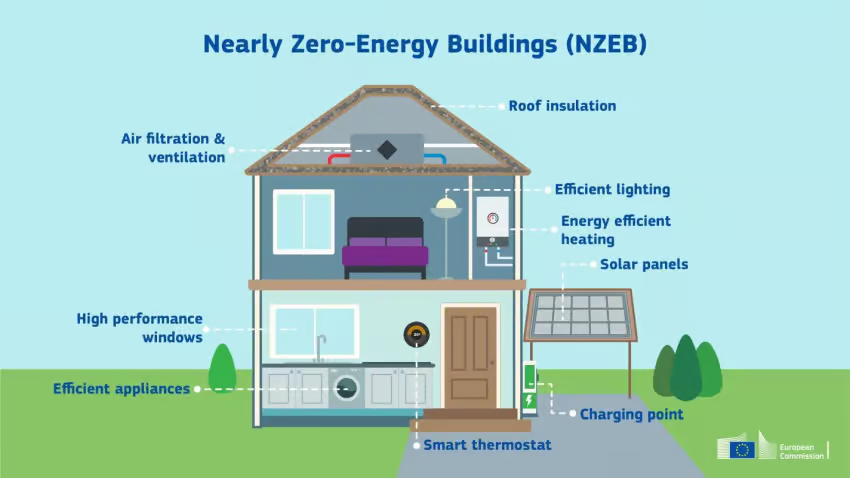

Crédit: [Commission européenne](http://cosmosmagazine.com/science/home-struction-energy-eficient/)
  
Nous vivons actuellement à une époque où presque tout est enregistré — un âge souvent appelé l’ère du Big Data. En conséquence, des modèles d’apprentissage automatique sont appliqués dans d’innombrables domaines afin d’exploiter au mieux ces données et d’optimiser les systèmes autant que possible.

L’Afrique est un continent en développement rapide, avec de nouveaux bâtiments qui s’élèvent chaque jour. Mais nous sommes-nous déjà demandé : ces bâtiments sont-ils conçus pour optimiser leur efficacité énergétique ?

C’est le défi que nous explorerons aujourd’hui. En utilisant un ensemble de données bien structuré sur des bâtiments aux caractéristiques architecturales variées, nous créerons un modèle d’apprentissage automatique pour prédire l’efficacité énergétique d’un bâtiment — en particulier, la quantité d’énergie nécessaire pour le chauffer ou le refroidir.


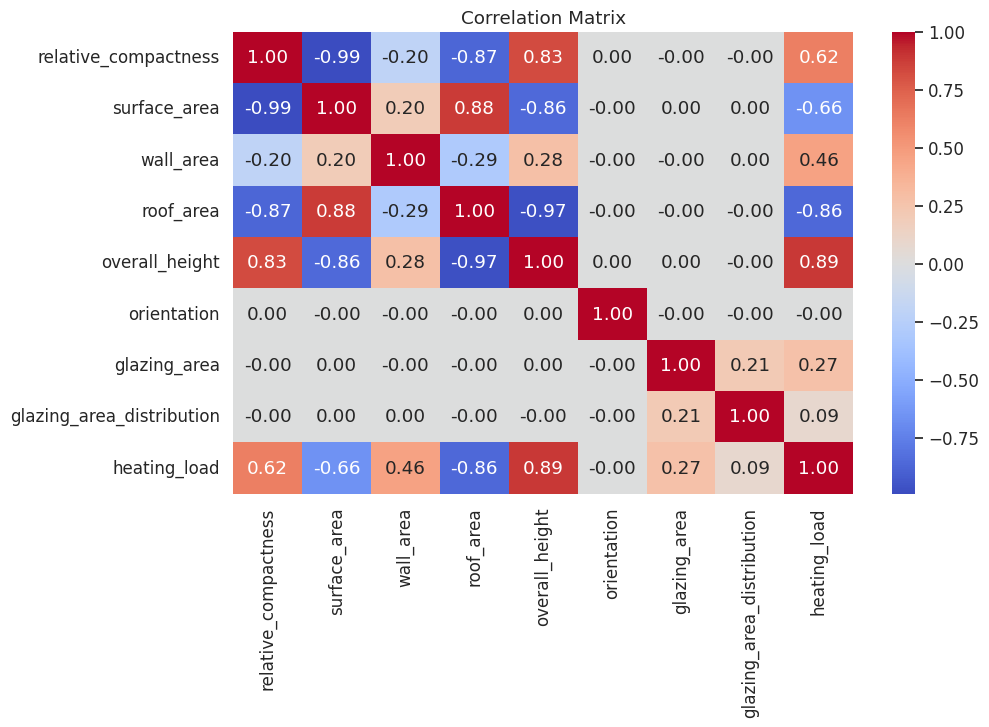

In [ ]:
## Hide code.
# @title Let's the Visualise data. (Run Cell)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

X = df.iloc[:, :-2]  # features
y = df["Y1"]         # heating load target

original_columns = [
    "Relative Compactness", 
    "Surface Area", 
    "Wall Area", 
    "Roof Area",
    "Overall Height", 
    "Orientation", 
    "Glazing Area", 
    "Glazing Area Distribution", 
    "Heating Load", 
    "Cooling Load"
]

# Replace the column names
df.columns = original_columns
# Drop Cooling Load
df = df.drop(columns=["Cooling Load"])

# Set up seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Cet ensemble de données comprend 8 caractéristiques de construction et 1 variable cible — la charge de chauffage, qui mesure l’énergie nécessaire pour chauffer le bâtiment. Comme le montrent les graphiques, certaines caractéristiques sont fortement corrélées entre elles, tandis que d’autres montrent peu ou pas de corrélation.

Avec les algorithmes traditionnels d’apprentissage automatique, nous passions généralement beaucoup de temps à explorer et à gérer les caractéristiques avant de former un modèle. Cependant, les modèles d’apprentissage profond ont la capacité d’apprendre et de hiérarchiser automatiquement les caractéristiques les plus pertinentes pour la tâche, ce qui réduit le besoin d’une sélection manuelle étendue.


## 1.2 **Modèles**

Les modèles transforment les données de manière utile. Ils prennent des données d’entrée et produisent la sortie souhaitée. Formellement, un modèle est une fonction $f(x)$ qui associe les données d’entrée $x$ (un échantillon de notre ensemble de données) à une sortie $y$ (l’étiquette). Par exemple, dans notre ensemble de données pour la prédiction énergétique, l’entrée est un vecteur comprenant différentes mesures du bâtiment telles que la surface, la compacité, l’orientation, la hauteur, etc., tandis que la sortie est la charge de chauffage prévue.

Le comportement du modèle est contrôlé par des paramètres, qui sont des valeurs ajustables mises à jour tout au long du processus d’apprentissage.


## 1.3 **Apprentissage**

**L'apprentissage** est le processus d'amélioration des performances d'un modèle en mettant à jour ses paramètres. Cette amélioration est guidée par une fonction **objective**, souvent appelée **fonction de perte**, qui mesure la performance du modèle.

### Fonction de perte

La **fonction de perte**, désignée comme $L$, quantifie la différence entre la prédiction du modèle $f(x)$ et le résultat réel $y$. Il produit un nombre qui représente à quel point la prédiction est proche du résultat réel.

- ** Prédiction**: $f(x)$
- ** Résultat réel**: $y$
- ** Fonction de perte**: $L(f(x),y)$

Le but d'apprendre est de **minimiser** cette fonction de perte. Bien que nous puissions également maximiser la fonction de perte en théorie, la minimisation est l'approche conventionnelle.

### Algorithme d'apprentissage

**L’algorithme d’apprentissage** est responsable de l’ajustement des paramètres du modèle afin de minimiser la fonction de perte. Intuitivement, on peut voir l’apprentissage comme le réglage des **boutons** (paramètres) du modèle pour obtenir le comportement souhaité. L’algorithme d’apprentissage effectue ce réglage, tandis que la fonction de perte nous indique à quel point ce réglage est efficace.

Formellement, l’apprentissage consiste à trouver les paramètres $\theta$ de notre modèle $f$ qui minimisent la fonction de perte $L$ sur l’ensemble de données $X$:

Minimiser $L(f(x; \theta), y)$

### Généralisation

Notre objectif n'est pas seulement de bien performer sur les données utilisées pendant l’entraînement, mais aussi de s'assurer que le modèle se performe bien sur des nouvelles données. Cet aspect sera discuté plus en détail dans la partie 3.

L'apprentissage peut se produire dans divers contextes. Nous explorerons les principaux types d'apprentissage dans la section suivante.


** Exercice 1.2 **: Lequel des énoncés suivants décrit le mieux le principe principal de l'apprentissage automatique?

(* Discutez avec vos voisins *).

**a**) Écriture d'algorithmes complexes pour résoudre des problèmes spécifiques.

**b**) Règles de programmation manuelle pour chaque scénario possible.

**c**) Permettre aux ordinateurs d'apprendre des données sans être explicitement programmée.

**c**) Développer une IA qui peut imiter les processus de reflexion humaine.


In [ ]:
selection = "a"  # @param ["a", "b", "c", "d"]
print(f"You selected: {selection}")

correct_answer = "c"
if selection != correct_answer:
  print("Incorrect answer, the correct answer is C. ML brings a paradigm shift in how we approach problem-solving with computers. Instead of manually programming every rule, machine learning allows computers to learn patterns and make decisions based on data.")
else:
  print("Nice, you got the correct answer!")

## **1.4 Types de problèmes d'apprentissage automatique**

D'une manière générale, les tâches d'apprentissage automatique peuvent être classées en trois catégories.

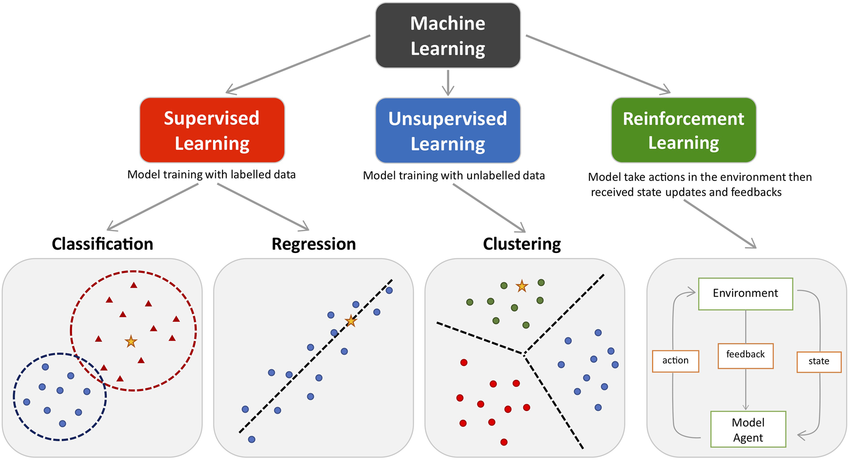

[Source de l'image](https://www.researchgate.net/publication/354960266/figure/fig1/as:1075175843983363@1633353305883/the-main-types-of-machine-lear-main-pproache-include-classification-and.png).

**Apprentissage supervisé:** Dans l’apprentissage supervisé, l’algorithme est entraîné sur un ensemble de données étiqueté, où chaque point de données d’entrée est associé à la sortie correcte (étiquette).
Le but est d’apprendre une correspondance entre les entrées et les sorties à partir des données utilisées pendant l’entraînement. Une fois entraîné, le modèle peut faire des prédictions précises sur de nouvelles données invisibles. Cette approche est couramment utilisée pour des tâches telles que la classification et la régression, où les bonnes réponses sont connues pendant la phase d’entraînement.


**Apprentissage non supervisé:** Dans l’apprentissage non supervisé, l’algorithme travaille sur un ensemble de données non étiqueté, ce qui signifie que les données ne possèdent pas d’étiquettes ni de résultats prédéfinis. L’objectif est de découvrir des motifs, des structures ou des relations au sein des données. Cela peut inclure le regroupement de points de données similaires (clustering) ou la réduction de la dimensionnalité pour révéler des schémas cachés. L’apprentissage non supervisé est souvent utilisé dans l’analyse exploratoire des données et pour identifier des groupements naturels dans les ensembles de données.

**Apprentissage par renforcement:** Dans l’apprentissage par renforcement, l’algorithme apprend à prendre des décisions en interagissant avec un environnement. L’apprenant, appelé agent, effectue des actions et reçoit des retours sous forme de récompenses ou de pénalités. L’objectif est d’apprendre une stratégie, qui maximise la récompense cumulative au fil du temps. L’apprentissage par renforcement est généralement appliqué dans des domaines tels que la robotique, les jeux et les systèmes autonomes, où un agent doit apprendre à naviguer dans des environnements complexes.


**Exercice 1.3**: Pouvez-vous identifier aux quelles des catégories les tâches suivante appartient?
- Enseigner à un robot comment marcher.
- Prédiction météorologique.
- Classification des e-mails de spam.
- Apprenez à un ordinateur à jouer aux échecs.
- Regrouper différents types de critiques de films.


In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Enseigner à un robot comment marcher -- Apprentissage par renforcement")
print("Prédiction météorologique -- Apprentissage supervisé")
print("Classification des e-mails de spam -- Apprentissage supervisé")
print("Apprenez à un ordinateur à jouer aux échecs -- Apprentissage par renforcement")
print("Regrouper différents types de critiques de films -- Apprentissage non supervisé")

## **1.5 Terminologie moderne**

Ces dernières années, plusieurs nouveaux concepts et termes ont émergé en AA. Nous discuterons brièvement de certaines de ces terminologies modernes qui pourraient être pertinentes pour votre parcours d'apprentissage :

<details>
<summary><strong>Terminologie générale (cliquez ici)</strong></summary>

- **Apprentissage en profondeur**: une branche de l’AA qui utilise des réseaux de neurones avec de nombreuses couches pour apprendre des modèles complexes dans les données. Ces réseaux sont particulièrement efficaces pour traiter de grandes quantités de données non structurées comme les images, les audios et les textes. L’apprentissage en profondeur a fait des progrès importants dans des domaines tels que la reconnaissance d’image et le traitement du langage naturel. Nous approfondirons ce sujet dans les sections 2 et 3.

- **Apprentissage auto-supervisé**: une approche où le modèle apprend des données elles-mêmes sans nécessiter d’étiquettes explicites. Le modèle est entraîné à prédire certaines parties des données d’entrée à partir d’autres parties, créant ainsi son propre signal de supervision. Ceci diffère de l’apprentissage supervisé, où le modèle apprend à partir d’exemples étiquetés fournis par des humains, et de l’apprentissage non supervisé, où le modèle découvre des structures dans des données non étiquetées. L’apprentissage auto-supervisé gagne en popularité grâce à sa capacité à exploiter de grandes quantités de données non annotées.
</details>

<details>
<summary> <strong> Terminologie des modeles générative (cliquez sur moi) </strong> </summary>

- **Modèles génératifs vs discriminants** :  
  Les modèles génératifs créent de nouvelles données similaires aux données existantes (par exemple, la génération d’images) en apprenant la distribution sous-jacente des données. En revanche, les modèles discriminants classent ou distinguent différents types de données (comme la classification d’images).  
  Exemples de modèles génératifs : réseaux antagonistes génératifs (GAN), autoencodeurs variationnels (VAE), et modèles autorégressifs, utiles pour des tâches comme la génération d’images et de texte.

- **Modèles autorégressifs** :  
  Ces modèles génèrent des séquences en prédisant l’élément suivant à partir des éléments précédents. Ils sont couramment utilisés dans la génération de texte, la composition musicale, et la prévision de séries temporelles.  
  Les **modèles de grande langue (LLM)** comme GPT-3 utilisent cette approche en prédisant le mot suivant dans une phrase basé sur les mots précédents.  
  Les **transformers**, un type de réseau de neurones utilisé dans les LLM, excellent dans le traitement parallèle des séquences.  
  Pour en savoir plus, consultez :  
  - [LLM 2023](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/large_langue_models.ipynb)  
  - [Practicals 2024](https://github.com/deep-learning-indaba/indaba-pracs-2024/tree/main)

- **Modèles de diffusion** :  
  Ces modèles génèrent des données en inversant un processus d’ajout de bruit. Par exemple, ils commencent avec une image bruyante et apprennent à supprimer le bruit pour produire une image claire.  
  Les modèles de diffusion ont permis de générer des images de haute qualité, avec des exemples célèbres comme Imagen et DALL·E.  
  Pour plus de détails, explorez le [tutoriel sur les modèles de diffusion](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/diffusion_models/diffusion_models.ipynb).

</details>


# **Partie 2 - Construire un modèle d'apprentissage en profondeur à partir de zéro** - 50 minutes ⏰

Avant l’explosion des techniques d’apprentissage en profondeur, l’ajustement de fonctions prédéfinies aux ensembles de données était l’approche incontournable en apprentissage automatique.  
Des exemples d’algorithmes classiques utilisant cette approche incluent les machines à vecteurs de support (SVM) et le classificateur naïf Bayes, entre autres (voir [Scikit-learn](https://scikit-learn.org/stable/Supervised_learning.html) pour une liste plus exhaustive).

Dans cette section, nous nous concentrerons sur les principes fondamentaux de l’apprentissage en profondeur et les mettrons en œuvre pas à pas en utilisant des fonctions de base Python et des opérations Numpy.

## 2.1 **Qu'est-ce qu'un réseau de neurones?**
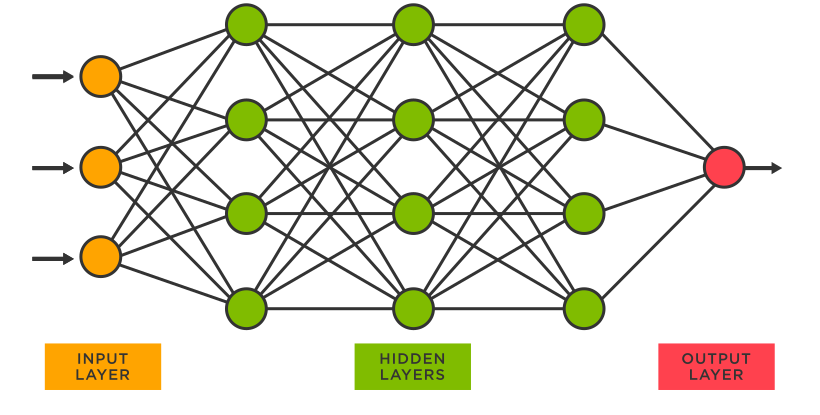

Image d'un réseau neurone avec 3 couches cachées. Crédit: [tibco.com](https://www.tibco.com/reference-center/what-is-a-aural-network)



Les réseaux de neurones sont une classe puissante de modèles d’apprentissage automatique, inspirés du fonctionnement du cerveau humain. Contrairement à l’apprentissage d’une fonction traditionnelle, où une transformation unique est appliquée aux données, les réseaux de neurones traitent les données d’entrée à travers une série de transformations avant d’atteindre la couche prédictive finale. Le terme Deep Learning provient du grand nombre de transformations appliquées aux données d’entrée.

Dans l’image ci-dessus, les cercles représentent les nœuds, et les liens qui les connectent représentent les poids du modèle (également appelés paramètres).

## 2.2 **Propagation avant**
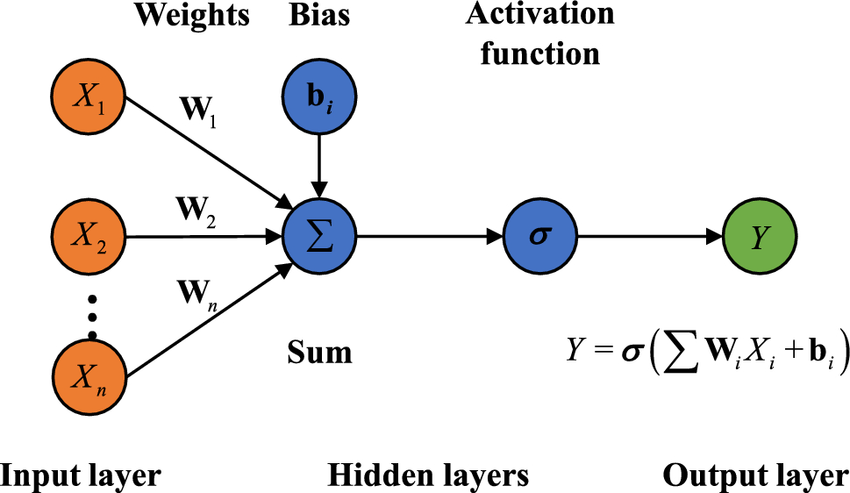

Image du calcul de la valeur de sortir d'un neurone. Crédit: [Physics-Informed_deep_Learning_Method_For_Predicting_TunNelling-INDOBSE_BOURD_DEformations](https://www.researchgate.net/publication/370026954_Physics-Informed_deep_Learning_Deformations)


Au cœur du réseau neuronal se trouve un neurone. La figure illustre comment nous calculons la sortie du neurone en fonction des entrées précédentes, c’est-à-dire des neurones de la couche précédente. L’expression  $$ y = σ \left(∑w_ix_i + b \right) $$ représente le calcul de sortie d'un seul nœud.
Si nous considérons la somme à l’intérieur, nous avons  
$$
f = \sum_i w_i x_i + b,
$$
donc le calcule est une fonction linéaire. Ici, $x_i$ et $w_i$ représentent respectivement l’entrée et le poids associés à l'index $i$, tandis que $b$ est appelé le terme biais.  
Pour rappel, ce calcul peut être réécrit sous forme de produit scalaire (dot product) ou de multiplication matricielle, donnant l’expression suivante:  
$$f = \mathbf{w}^T \mathbf{x} + b.$$
Notez que nous utilisons des symboles en gras pour indiquer des vecteurs

**Tâche de code:**

Dans la cellule précédente, nous avons introduit la **fonction linéaire**, qui est une opération clé pour implémenter les réseaux de neurones.  
Lors de la mise en œuvre d'un modèle d'apprentissage automatique, nous cherchons à exploiter les techniques d'**algèbre linéaire** et les ressources informatiques disponibles afin de traiter **un lot de données** (*batch*) en une seule opération.

Considérons un ensemble de données $\mathbf{X}$, où plusieurs exemples sont empilés dans une matrice.  
L’objectif est d’écrire une fonction qui applique un **modèle linéaire** à chaque exemple de cet ensemble.

In [ ]:
# @title Your code here
def linear_model(w: np.array, b: np.array, X: np.array) -> np.array:
  # complete this code

  m = ... # update me. Hint: # compute m = f(x) here using w,b and X

  return m

In [ ]:
# @title Run me to test your code

def test_linear_model():
  X = np.array([[210], [160], [240], [140], [300]])
  w = np.array([[2.0]])
  b = np.array([[1.0]])
  print(X.shape, w.shape, b.shape)
  expected = np.array([[210*2], [160*2], [240*2], [140*2], [300*2]]) + 1
  output = linear_model(w, b, X)
  assert (expected == output).all(), "Test failed!"
  print("Nice! Your answer looks correct.")

test_linear_model()

In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def linear_model(w: np.array, b: np.array, X: jnp.ndarray) -> jnp.ndarray:
  # compute m = f(x) here using w,b and X
  m = X@w.T + b

  return m

Maintenant que nous savons comment calculer le terme entre parenthèses dans notre calcul de réseau de neurones, définissons ce qui se passe lorsque nous calculons l'expression entière.  
Nous devons appliquer la fonction $\sigma$ à la sortie de la fonction linéaire.  
Cette fonction est appelée **fonction d'activation**.

<font color='red'>**Que sont exactement les fonctions d'activation?**</font>

Les fonctions d'activation sont essentielles dans les réseaux de neurones.  
L'entrée de chaque nœud est une combinaison linéaire de tous les nœuds de la couche précédente.  
Sans appliquer une fonction d'activation — également appelée *non-linéarité* —, l'ensemble du réseau neuronal, peu importe le nombre de couches, se réduit à un modèle linéaire simple.  
Ainsi, les fonctions d'activation sont utilisées pour **casser la linéarité** et garantir que l'on construit une fonction non linéaire complexe.

Examples de functions d'activations:

- **Rectified Linear Unit (ReLU)**  
  $$\text{ReLU}(x) = \max(0, x)$$  
  L'unité linéaire rectifiée est la fonction d'activation la plus utilisée.  
  Elle mappe les entrées dans l'intervalle $[0, \infty]$ en envoyant toutes les valeurs négatives à 0.  
  Elle est monotone et sa dérivée aussi.  
  Cependant, un inconvénient est qu'elle met toutes les valeurs négatives à zéro, ce qui peut réduire la capacité du modèle à s'adapter correctement aux données.

- **Sigmoïde**  
  $$\sigma(x) = \frac{1}{1 + e^{-x}}$$  
  La fonction sigmoïde mappe les entrées dans l'intervalle $[0, 1]$.  
  Elle est idéale pour prédire des probabilités.  
  Elle est différentiable et monotone, mais **sa dérivée n'est pas monotone**, ce qui limite son utilisation dans les couches cachées.  
  On l'utilise donc surtout dans les couches de sortie.

- **Tangente hyperbolique (tanh)**  
  $$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$  
  Cette fonction est similaire à la sigmoïde, mais elle mappe les entrées dans l'intervalle $[-1, 1]$.  
  Sa plage plus large permet une meilleure propagation des gradients.  
  Comme la sigmoïde, elle est surtout appliquée aux couches de sortie.


Implémentation de la function d'activation [relu](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375).



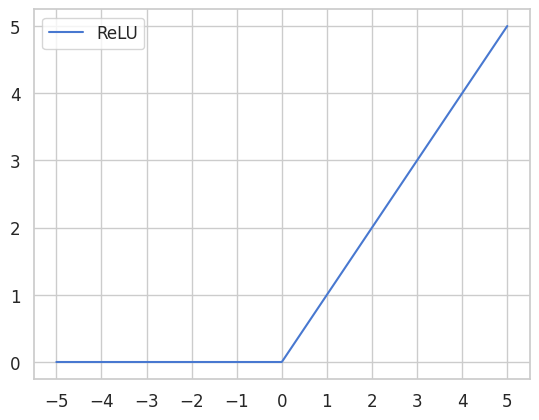

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  return np.maximum(0, x)

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = act_fn(x)
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Tâche de code:** Implémentez et tracez une autre fonction d'activation de votre choix.


In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this


<details>
<summary> <strong> Types de réseaux de neurones (cliquez sur moi) </strong> </summary>

- **Réseaux de Neurones Feedforward** : Ce type de réseau traite les données de manière linéaire, de l’entrée vers la sortie, sans boucles. Ils sont couramment utilisés pour des tâches où les caractéristiques d’entrée des données sont totalement indépendantes les unes des autres.

- **Réseaux de Neurones Récurrents (RNN)** : Conçus pour les données séquentielles comme les séries temporelles et les textes. Les RNN utilisent une boucle de rétroaction pour conserver une mémoire des entrées précédentes, ce qui les rend adaptés au traitement de données séquentielles.

- **Réseaux de Neurones Convolutionnels (CNN)** : Spécialement conçus pour les tâches liées aux images, les CNN extraient des caractéristiques à partir d’images grâce à une couche de convolution, qui identifie des motifs comme les contours et les formes.

- **Réseaux Antagonistes Génératifs (GAN)** : Composés d’un générateur et d’un discriminateur, les GAN opposent ces deux composants. Le générateur crée des données tandis que le discriminateur évalue leur authenticité. Ce processus d’opposition permet au générateur de produire des données de plus en plus réalistes, souvent utilisées pour générer des images, vidéos et sons.

</details>


**Implémentons la propagation avant complète d’un réseau de neurones feedforward**

Maintenant que nous savons comment calculer la sortie d’un seul neurone dans un réseau de neurones, nous allons propager l’information à travers les couches — depuis les caractéristiques d’entrée, en passant par les couches cachées, jusqu’à la sortie prédite finale.  
Ce processus est appelé **<font color='red'>propagation avant</font>**.

Considérons le réseau de neurones ci-dessous.

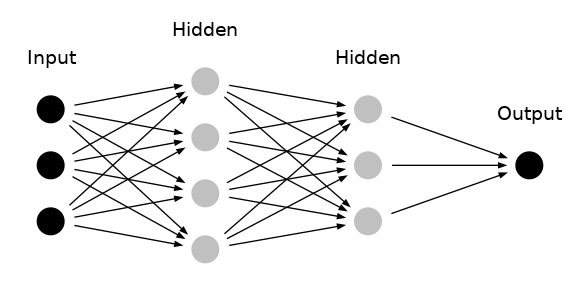

**Exercice 2.1** : Considérons ce qui précède.  
Si nous avons un lot (*batch*) de taille **B**, c’est-à-dire que nous transmettons **B** exemples au réseau en même temps, et en réfléchissant aux poids de chaque couche, pouvez-vous écrire quelle est la forme (*shape*) des informations à chaque couche ?  
Supposons que **B = 5**. Pensez également à ce que devraient être les poids pour chaque couche.

In [ ]:
# @title Your solution here
B = 5
input_layer = ... # update me. for example you can put (5, 2) if think the shape is 5 by 2
hidden_layer_1 = ... # update me
hidden_layer_2 = ... # update me
output_layer = ... # output layer

In [ ]:
# @title Run me to check your anwsers
def test_shape_understanding():

  if input_layer == (5, 3):
    print("You got the right shape for the input layer!")
  else:
    print("The correct shape for the input layer is (5,3)")

  if hidden_layer_1 == (5, 4):
    print("You got the right shape for the first hidden layer!")
  else:
    print("The correct shape for the first hidden layer is (5,4)")

  if hidden_layer_2 == (5, 3):
    print("You got the right shape for the second hidden layer!")
  else:
    print("The correct shape for the second hidden layer is (5,3)")

  if output_layer == (5, 1):
    print("You got the right shape for the output layer!")
  else:
    print("The correct shape for the output layer is (5,1)")


  return

test_shape_understanding()

Maintenant que nous connaissons la forme de nos données, nous pouvons implémenter la fonction de propagation avant de notre réseau de neurones.  

Avant de traiter les données, initialisons nos paramètres avec des valeurs aléatoires.  

Habituellement, lorsqu’on implémente des réseaux de neurones pour des modèles d'AA, on stocke tous les paramètres ensemble dans un objet dictionnaire, chaque couche utilisant une clé différente.



In [ ]:
# @title Helper function: intialise parameters
params = {}
params["layer_0"] = {}
params["layer_0"]["w"] = 3*np.ones((4,3)) # since the input layer has 3 features and next layer has 4 neurons
params["layer_0"]["b"] = 0.5*np.ones((4))

params["layer_1"] = {}
params["layer_1"]["w"] = 2*np.ones((3,4)) # since the input layer has 3 features and next layer has 3 neurons
params["layer_1"]["b"] = 2*np.ones(3)

params["layer_2"] = {}
params["layer_2"]["w"] = 3*np.ones((1,3)) # since the input layer has 3 features and next layer has 1 neurons
params["layer_2"]["b"] = 0.5*np.ones(1)

X = np.random.rand(5,3) # we will use this for testing

**Tâche de code** : Implémentez une fonction qui réalise la propagation avant du réseau de neurones ci-dessus en utilisant la fonction d’activation ReLU pour les couches intermédiaires.

In [ ]:
# @title Your code here
def forward_pass(params: dict, X: np.array) -> np.array:
  # complete this code

  w0 = params["layer_0"]["w"]
  b0 = params["layer_0"]["b"]
  z1 = linear_model(w0, b0, X) # first linear layer
  a1 = relu(z1) # apply activation

  w1 = params["layer_1"]["w"]
  b1 = ... # update me
  z2 = ...
  a2 = ...

  # implement the rest of the layers

  z3 = ...

  cache = (z1, a1, z2, a2, z3)
  return z3, cache

z, _ = forward_pass(params, X)
assert z.shape == (5,1)
print("Congratulations!, you got the right output shape. Check below if your implementation is similar to ours!")

In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def forward_pass(params: dict, X: np.array) -> np.array:
  # complete this code

  w0 = params["layer_0"]["w"]
  b0 = params["layer_0"]["b"]
  z1 = linear_model(w0, b0, X) # first linear layer
  a1 = relu(z1) # apply activation

  w1 = params["layer_1"]["w"]
  b1 = params["layer_1"]["b"]
  z2 = linear_model(w1, b1, a1)
  a2 = relu(z2)

  w2 = params["layer_2"]["w"]
  b2 = params["layer_2"]["b"]
  z3 = linear_model(w2, b2, a2)

  cache = (z1, a1, z2, a2, z3)

  return z3, cache

## **2.3 Fonctions de perte**


Chaque fois que nous ajustons un modèle à des données, nous avons besoin d’une fonction pour mesurer la qualité des performances du modèle. Cette fonction s’appelle la **fonction de perte**. Elle mesure l’ampleur des erreurs entre notre modèle et les données.

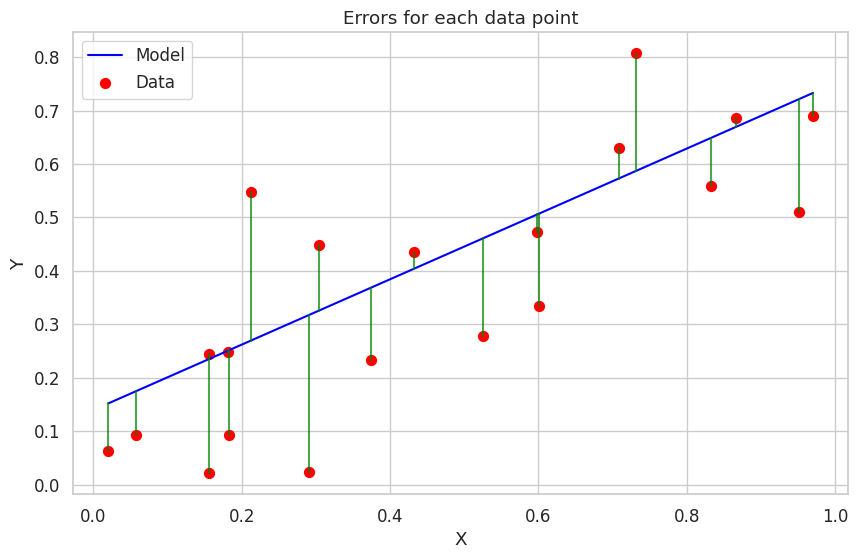

In [ ]:
# @title Helper code to plot errors (Run me)

# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

# Simulating the points y value with some distortion to using y = mx + c + randomness
points_y = slope_random_line * points_x + (intercept_random_line + np.random.normal(0, 1, num_points)*0.15)

# Create the scatter plot of distances
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()

Considérons la figure ci-dessus avec les points de données en rouge.  
Si la ligne bleue représente notre modèle, alors les lignes verticales vertes correspondent aux erreurs que nous commettons sur chaque point de données. La fonction de perte cherche à capturer l’erreur totale commise pour tous les points de données. Une fonction de perte que nous pouvons utiliser dans ce cas est la <font color='red'>erreur quadratique moyenne</font> entre les valeurs prédites et les valeurs réelles. Cela revient à sommer toutes les distances en vert. Mathématiquement, cela s’écrit: $$\mathcal{L}(\mathbb{θ}) = \frac{1}{m} \sum_{i} (y_i - \hat{y}_i)^2,$$
où $\mathbb{θ} = [\mathbf{w}, b]$, $\mathcal{L}$ désigne la fonction de perte,$y$ représente la valeur réelle ou attendue, $\hat{y}$ la valeur prédite par le modèle, et $m$ le nombre total de points de données.

<font color='red'>Note : Il existe différentes fonctions de perte que l’on pourrait utiliser dans ce cas. Vous pouvez en consulter d’autres fonctions de perte courantes [ici](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>

**Tâche de code :** Implémentez la fonction de perte ci-dessus en utilisant la fonction `forward_pass` du modèle définie précédemment.



In [ ]:
# @title Your code here
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred, cache = forward_pass(...) # update me

  loss = ... # your code here

  return 0

In [ ]:
# @title Run to test my code
def test_linear_loss_fn():
  pred, cache = forward_pass(params, X)
  y = np.ones(pred.shape)
  loss = np.mean((pred-y)**2)
  assert loss_fn(params, X, y) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred, cache = forward_pass(params, X)

  loss = np.mean((pred-y)**2)

  return loss

## **2.4 Optimisation**
L'optimisation, comme son nom l'indique, est le processus de recherche des paramètres optimaux du modèle, c’est-à-dire l’ensemble des paramètres qui minimise la fonction de perte.  

Mathématiquement, cela s’écrit comme suit :
$$\hat{\theta} = \underset{\mathbf{\theta}}{\operatorname{argmin}} \ \mathcal{L}(\mathbb{θ}).$$



<font color='red'>Comment optimisons-nous?</font> :  
La figure ci-dessous est un exemple de représentation de la fonction de perte pour différentes valeurs de $\mathbf{w}$ et $b$ pour une droite. La valeur minimale est indiquée par une étoile. Notre objectif en optimisation est d’identifier ce point.

In [ ]:
# @title Helper code (to visualise loss landscape)
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
# use y_min = mx+c again to simulate the predicted values
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

# Plot the Loss Grid
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

Une approche de **force brute** consisterait à calculer la fonction de perte pour une large plage de valeurs possibles des paramètres, puis à sélectionner les paramètres correspondant à la valeur minimale de la perte. Bien qu’une telle approche puisse fonctionner pour des modèles simples avec 1 ou 2 paramètres, elle est très fastidieuse, et le nombre de valeurs possibles à évaluer pour des modèles plus complexes rend cette méthode impraticable.

**Optimisation basée sur le gradient**

La bonne approche est d’utiliser le calcul différentiel. On sait que la dérivée d’une fonction est nulle en chaque point critique (maximums et minimums locaux).  
Ainsi, pour trouver $\theta$ qui minimise la fonction de perte, il faut résoudre l’équation  
$$\frac{\partial \mathcal{L}}{\partial \theta} = 0.$$

Il est possible de calculer l’expression exacte des dérivées pour des modèles simples, mais cela devient très difficile et fastidieux pour des modèles plus complexes.  

Cependant, si nous disposons d’une méthode permettant d’estimer la valeur de cette dérivée pour une valeur donnée de $\theta$, alors nous pouvons modifier progressivement $\theta$ jusqu’à convergence vers le minimum.  

Un algorithme populaire en apprentissage automatique pour cela est l’**algorithme de descente de gradient** <font color='red'>(gradient descent algorithm)</font>.  

L’algorithme fonctionne comme suit :

1. Initialiser les paramètres avec des valeurs aléatoires.  
2. Répéter pendant un certain nombre d’itérations, et à chaque itération, mettre à jour les paramètres selon la formule suivante :
$$
\mathbf{\theta} = \mathbf{\theta} - \eta \frac{\partial \mathcal{L}}{\partial \theta},
\tag{Eq. 1}
$$

où $\eta$ est appelé **taux d’apprentissage** (learning rate). C’est un hyperparamètre de l’algorithme de descente de gradient, ce qui signifie qu’il doit être choisi à l’avance.

**Comment calculer les dérivés?**

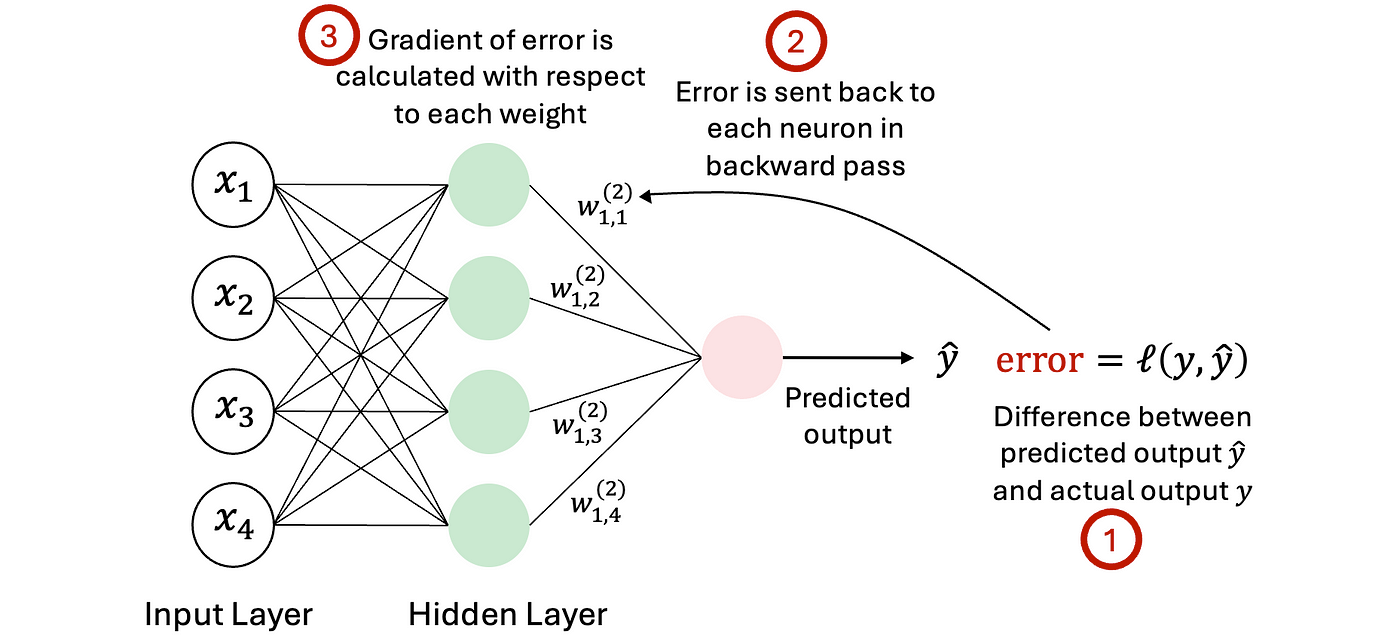

Image: Backprogration illustration. Credit: [Medium](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40lmpo%2Fbackpropagation-the-backbone-of-neural-network-training-64946d6c3ae5&psig=AOvVaw3dUp-Prvedf7c07LzYoHxu&ust=1752132484135000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMiTqaSgr44DFQAAAAAdAAAAABBq)

La méthode la plus courante pour calculer les dérivées dans les réseaux de neurones est d’utiliser <font color='red'> algorithme de rétropropagation</font>.  

Pour cela, on propage les erreurs depuis la sortie finale vers l’arrière, à travers le réseau, de droite à gauche.  

Comme mentionné dans le tutoriel, l’ingrédient clé qui rend cela possible est la règle de la chaîne, c’est-à-dire que pour une fonction intermédiaire $z$, on a:

$$
\frac{\partial \mathcal{L}}{\partial x} = \frac{\partial \mathcal{L}}{\partial z} \cdot \frac{\partial z}{\partial x}
$$

Rappel: les équations de la propagation avant peuvent s’écrire comme suit:

\begin{aligned}
z_1 &= \mathbf{w}_1^T\mathbf{x} + b_1 \\
a_1 &= \text{ReLU}(z_1) \\
z_2 &= \mathbf{w}^T a_1 + b_2 \\
a_2 &= \text{ReLU}(z_2) \\
z_3 &= \mathbf{w}^T a_2 + b_3 \\
\hat{y} &= z_3
\end{aligned}

Puis, en utilisant la règle de la chaîne à partir de la fonction de perte d’erreur quadratique moyenne, les équations suivantes correspondent à la propagation arrière:

\begin{aligned}
\delta_3 &= \frac{1}{m} (\hat{y} - y) \\
\nabla \mathbf{w}_3 &= \delta_3^T A_2 \\
\nabla b_3 &= \sum_{i=1}^m \delta_3^{(i)} \\[10pt]
\delta_2 &= (\delta_3 \mathbf{w}_3) \odot \text{ReLU}'(Z_2) \\
\nabla \mathbf{w}_2 &= \delta_2^T A_1 \\
\nabla b_2 &= \sum_{i=1}^m \delta_2^{(i)} \\[10pt]
\delta_1 &= (\delta_2 \mathbf{w}_2) \odot \text{ReLU}'(Z_1) \\
\nabla \mathbf{w}_1 &= \delta_1^T X \\
\nabla b_1 &= \sum_{i=1}^m \delta_1^{(i)}
\end{aligned}

Où $\text{ReLU}'$ désigne la dérivée de la fonction d’activation ReLU et $\odot$ représente la multiplication élément par élément des matrices.

**Tâche de code <font color='blue'>(exercice optionnel)</font> :** Implémentez la propagation arrière pour notre réseau de neurones à 4 couches en utilisant les équations ci-dessus.  

La raison pour laquelle nous conservons une copie de toutes les sorties intermédiaires pendant la propagation avant est que nous en avons besoin lors de la propagation arrière.

In [ ]:
# @title Your code here

def relu_derivative(x):
    return (x > 0).astype(float)

def backward_pass(params, X, y, cache):
    # update this function to compute the gradients and return them in a similar dictionary as the params
    z1, a1, z2, a2, z3 = cache
    y_hat = z3
    m = y.shape[0]
    w3 = params["layer_2"]["w"]
    w2 = params["layer_1"]["w"]

    ...
    ...

    grads = {}
    grads["layer_0"]["w"] = ...
    grads["layer_0"]["w"] = ...
    grads["layer_0"]["b"] = ...

    grads["layer_1"] = {}
    grads["layer_1"]["w"] = ...
    grads["layer_1"]["b"] = ...

    grads["layer_2"] = {}
    grads["layer_2"]["w"] = ...
    grads["layer_2"]["b"] = ...

    return grads


def check_shapes_match(params, grads):
    for layer in params:
        for key in params[layer]:
            if params[layer][key].shape != grads[layer][key].shape:
                print(f"Shape mismatch in {layer} for '{key}': "
                      f"params shape = {params[layer][key].shape}, "
                      f"grads shape = {grads[layer][key].shape}")
                return False
    print("✅ All parameter and gradient shapes match. Now check below confirm you got everything right!")
    return True

y = np.random.rand(5,1)
y_hat, cache = forward_pass(params, X)
grads = backward_pass(params, y, cache)
assert check_shapes_match

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def relu_derivative(x):
    return (x > 0).astype(float)

def backward_pass(params, X, y, cache):
    # update this function to compute the gradients and return them in a similar dictionary as the params
    z1, a1, z2, a2, z3 = cache
    y_hat = z3
    m = y.shape[0]
    w3 = params["layer_2"]["w"]
    w2 = params["layer_1"]["w"]

    # Output layer gradient
    delta3 = (y_hat - y) / m                             # (m, 1)
    dW3 = delta3.T @ a2                                  # (1, h2)
    db3 = np.sum(delta3, axis=0)                         # (1,)

    # Hidden layer 2
    delta2 = (delta3 @ w3) * relu_derivative(z2)         # (m, h2)
    dW2 = delta2.T @ a1                                  # (h2, h1)
    db2 = np.sum(delta2, axis=0)                         # (h2,)

    # Hidden layer 1
    delta1 = (delta2 @ w2) * relu_derivative(z1)         # (m, h1)
    dW1 = delta1.T @ X                                   # (h1, d)
    db1 = np.sum(delta1, axis=0)                         # (h1,)


    dW1, db1, dW2, db2, dW3, db3
    grads = {}
    grads["layer_0"] = {}
    grads["layer_0"]["w"] = dW1
    grads["layer_0"]["b"] = db1

    grads["layer_1"] = {}
    grads["layer_1"]["w"] = dW2
    grads["layer_1"]["b"] = db2

    grads["layer_2"] = {}
    grads["layer_2"]["w"] = dW3
    grads["layer_2"]["b"] = db3

    return grads

y = np.random.rand(5,1)
y_hat, cache = forward_pass(params, X)
grads = backward_pass(params, X, y, cache)

## **2.7 Mettre tout cela ensemble**
Nous avons maintenant toutes les pièces nécessaires pour implémenter notre algorithme d’apprentissage. Comme mentionné, nous pouvons utiliser la descente de gradient pour mettre à jour les paramètres du modèle.

In [ ]:
# @title Code demonstration: Batch gradient descent implementation

def value_and_grad(params, X, y):
  """Helper function to compute the loss and the gradients of the parameters"""
  y_hat, cache = forward_pass(params, X)
  grads = backward_pass(params, X, y, cache)
  loss = np.mean((y_hat-y)**2)

  return loss, grads

def update_params(params, grads, learning_rate):
    for layer in params:
        for key in params[layer]:
            params[layer][key] = params[layer][key] - learning_rate * grads[layer][key]

    return params

def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = value_and_grad

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)
    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = update_params(params, grads, learning_rate)

    loss_train.append(np.mean(loss_train_epoch))
    # Compute the validation loss
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  # Only plot after a few iterations because initial loss is too high
  iters = range(1, num_epochs+1)
  plt.plot(iters[1:], loss_train[1:], label='Training Loss')
  plt.plot(iters[1:], loss_val[1:], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [ ]:
# @title Créons des données factices pour tester le code.
def create_dummy_data():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 2300
  num_features = 3  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  X = np.random.uniform(0, 10, size=(num_samples, num_features))
  y, _ = forward_pass(params, X)

  # Add some noise
  noise = np.random.normal(size=(num_samples,1))*5
  print(np.max(y), np.min(y), np.max(noise), np.min(noise))
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[0:num_train_samples], y[0:num_train_samples]
  X_val, y_val = X[num_train_samples:], y[num_train_samples:]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  initial_params = {}
  initial_params["layer_0"] = {}
  initial_params["layer_0"]["w"] = np.random.rand(4,3)
  initial_params["layer_0"]["b"] = np.zeros(4)

  initial_params["layer_1"] = {}
  initial_params["layer_1"]["w"] = np.random.rand(3,4)
  initial_params["layer_1"]["b"] = np.zeros(3)

  initial_params["layer_2"] = {}
  initial_params["layer_2"]["w"] = np.random.rand(1,3)
  initial_params["layer_2"]["b"] = np.zeros(1)

  return train_data, val_data, initial_params


In [ ]:
train_data, val_data, initial_params = create_dummy_data()

3221.245902650036 3221.245902650036 16.802292451805062 -17.759276364375797


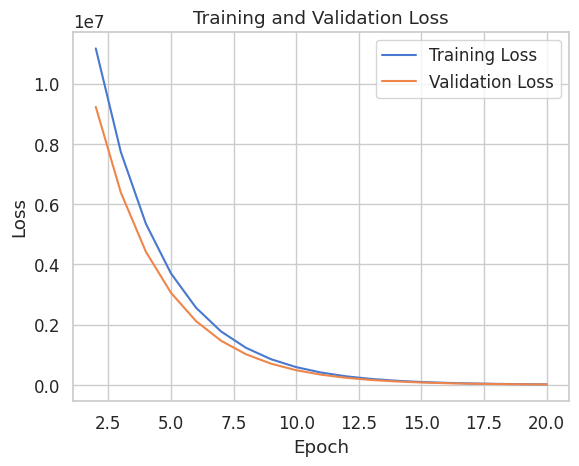

In [ ]:
fit_params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=1e-3, num_epochs=20, batch_size=10)

**Félicitations !** 🎊 Nous avons réussi à implémenter et entraîner un réseau de neurones multi-couches from scratch en utilisant uniquement Numpy. Prenez le temps d’assimiler toutes ces informations et d’essayer de comprendre le code de la fonction de descente de gradient par batch. Nous avons beaucoup parlé des hyperparamètres, mais nous donnerons plus de détails à ce sujet dans les prochaines parties des travaux pratiques.

# **Partie 3 – Construire des modèles plus grands avec des frameworks DL spécialisés** – 30 minutes ⏰

Dans la section précédente, nous avons implémenté un simple réseau de neurones à 3 couches from scratch en utilisant NumPy. Même si ce réseau ne comportait que 3 couches et au plus 4 neurones par couche, il était déjà évident à quel point ce processus peut être **fastidieux et source d’erreurs**.  

Imaginez maintenant essayer d’implémenter un modèle d’apprentissage profond **à la pointe de la technologie**, comme celui qui alimente ChatGPT, de la même manière. Ce serait extrêmement difficile, et nous risquerions de faire beaucoup d’erreurs rien qu’en essayant de retenir tous les détails nécessaires. De plus, les modèles modernes d’apprentissage profond sont entraînés sur d’énormes jeux de données et nécessitent une **accélération GPU** ou **TPU** pour un entraînement et une inférence efficaces. Ces configurations reposent souvent sur un **traitement distribué des données**, qui est très complexe à gérer manuellement.  

Heureusement, nous n’avons pas à tout faire from scratch. Nous pouvons tirer parti de frameworks puissants et performants comme [JAX](https://docs.jax.dev/en/latest/) et [PyTorch](https://pytorch.org/get-started/locally/). Ces outils **abstraient les détails complexes mathématiques et liés au matériel**, nous permettant de nous concentrer sur la conception et l’entraînement des modèles plus rapidement et de manière plus fiable.  

Dans cette section, nous présenterons brièvement JAX, le framework que nous utiliserons pour la majorité des travaux pratiques cette année.


## 3.1 **Introduction à Jax**

[JAX](https://jax.readthedocs.io/en/latest/index.html) est un package/framework Python conçu pour des opérations numériques haute performance et l’apprentissage automatique. On peut le voir comme une version accélérée de NumPy, souvent utilisée avec des bibliothèques de réseaux de neurones de plus haut niveau comme [Flax](https://github.com/google/flax).

### Similarités ✅

JAX et NumPy permettent tous deux de faire des opérations sur des tableaux, avec une interface similaire. Cela signifie que vous pouvez exécuter beaucoup de vos opérations NumPy préférées dans JAX, en utilisant une API proche.

Faisons quelques opérations de base avec les deux.

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n{title}")
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Create arrays for use in examples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])

Indexation et tranche - `[]` - Accès aux éléments dans un tableau. Par exemple `Array[0]` pour obtenir le premier élément, ou `Array[1:3]` pour obtenir des éléments 1 et 2.


In [ ]:
np_slice = np_array1[1:4]
jax_slice = jax_array1[1:4]
print_comparison("Array Slicing", np_slice, jax_slice)


Array Slicing
NumPy: [2 3]
JAX:   [2 3]
----------------------------------------


Multiplication de matrices - `.dot` - Multiplier deux matrices ensemble.

In [ ]:
# Create arrays for use in examples
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Matrix Multiplication", np_matmul, jax_matmul)


Matrix Multiplication
NumPy: [[ 7 10]
 [15 22]]
JAX:   [[ 7 10]
 [15 22]]
----------------------------------------


### Différences ❌

Bien que JAX et NumPy présentent certaines similitudes, ils ont aussi des différences importantes. Nous allons discuter ici de quelques différences au niveau de l’API.

**Generation des nombres aléatoire dans NumPy vs JAX**

JAX exige que vous soyez plus explicite lors de la génération de nombres aléatoires. Vous devez fournir une clé à chaque fois que vous appelez une fonction qui utilise de l’aléatoire.

Voyons les différences dans la façon dont JAX et NumPy génèrent des nombres aléatoires.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Generate random numbers using NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Random: {np_rand}")

# Generate random numbers using JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Random: {jax_rand}")

NumPy Random: [0.5488135  0.71518937 0.60276338]
JAX Random: [0.947667   0.9785799  0.33229148]


Dans JAX, vous devez passer une clé aux fonctions aléatoires **à chaque fois** que vous les appelez. Cette clé est utilisée pour générer des nombres aléatoires de manière reproductible. On peut considérer cette clé comme une graine (seed) pour le générateur de nombres aléatoires.

Pour générer plusieurs nombres aléatoires dans JAX, il faut créer de nouvelles clés (en utilisant `split`) à chaque appel de la fonction aléatoire. Cela garantit que les nombres aléatoires sont indépendants les uns des autres.

## **3.2 Core Jax Primitives - `Jit` et` Grad`**

Dans cette section, nous mentionnerons brièvement deux transformations jax communes: `jit` et `grad`.


### `jit` - Compilation Juste-à-Temps

`jit` (compilation juste-à-temps) compile et met en cache les fonctions Python JAX afin qu’elles puissent être exécutées efficacement sur XLA pour *accélérer les appels de fonction*.

`jit` prend une fonction Python en entrée et renvoie une version compilée de cette fonction. Il suffit d’entourer votre fonction avec `jax.jit` pour la compiler et l’appeler :


In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to add two arrays
def add(a, b):
    return jnp.add(a, b)

# Use JIT to compile the function
add_jitted = jax.jit(add)

# Create some example arrays
x = jnp.array([1.0, 2.0, 3.0])
y = jnp.array([4.0, 5.0, 6.0])

# Call the jitted function
result = add_jitted(x, y)
print(result)

[5. 7. 9.]


Il existe des règles concernant les types de fonctions pouvant être compilées avec `jit`. Par exemple, les fonctions contenant un contrôle de flux Python (comme des boucles ou des conditions) peuvent ne pas être compatibles avec `jit`.  

Vous pouvez trouver plus d’informations sur `jit` dans la [documentation de JAX](https://jax.readthedocs.io/en/latest/jit-compilation.html#why-can-t-we-just-jit-everything).



### `grad` - Différentiation automatique

`grad` est utilisé pour calculer automatiquement le gradient d’une fonction dans JAX. Il peut être appliqué aux fonctions Python et NumPy, ce qui signifie que vous pouvez différencier à travers des boucles, des branches, des récursions et des closures.

`grad` prend en entrée une fonction `f` et renvoie une fonction. Si `f` est une fonction mathématique $f$, alors `grad(f)` correspond à $f'$ (notation de Lagrange), avec `grad(f)(x)` correspondant à $f'(x)$.

Voici un exemple simple d’utilisation de `grad`:



In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to compute the square of a number
def square(x):
    return x ** 2

# Use grad to compute the gradient of the square function
grad_square = jax.grad(square)

# Compute the gradient at x = 3
x = 3.0
grad_at_x = grad_square(x)
print(grad_at_x)

6.0


Une autre fonction similaire dans JAX est `jax.value_and_grad` qui renvoie à la fois la valeur de la fonction et son gradient. Par exemple, on peut l’utiliser pour remplacer la fonction `value_and_grad` que nous avons écrite précédemment lors de l’implémentation de la **descente de gradient par lot**.

In [ ]:
loss, grads = jax.value_and_grad(square)(x)
print(f"loss: {loss}")
print(f"gradients: {grads}")

loss: 9.0
gradients: 6.0


## 3.2 **Implémentation de notre réseau neuronal en JAX avec Flax**

Il existe différents modules de haut niveau qui peuvent être utilisés pour développer des réseaux neuronaux profonds, ce qui évite de tout implémenter depuis zéro. Par exemple, pour les modèles basés sur JAX, nous pouvons utiliser [Flax](https://flax.readthedocs.io/en/latest/getting_started.html). De plus, des techniques d’optimisation avancées peuvent être mises en œuvre avec [Optax](https://optax.readthedocs.io/en/latest/). Dans cette section, nous utiliserons Flax pour réimplémenter notre simple réseau neuronal à 3 couches.


In [ ]:
# @title Code demonstration: building a simple neural network with flax
# Code for a 3-layer neural network using flax.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.
import flax.linen as nn

class Network(nn.Module):
  hidden_size_1: int
  hidden_size_2: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

Dans cette implémentation, nous définissons uniquement notre architecture et ce que nous souhaitons pour chaque couche. JAX prendra en charge à la fois la propagation avant (forward pass) et la rétropropagation (backward pass) lorsqu’on lui fournira des données. Dans la cellule ci-dessous, nous allons écrire du code pour instancier notre réseau et initialiser ses paramètres.

In [ ]:

# @title Code demonstration: intialising the model
from clu import parameter_overview

seed = 32
input_size = 3
hidden_size_1 = 4
hidden_size_2 = 3
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size_1, hidden_size_2, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+---------+------+
| Name                  | Shape  | Dtype   | Size |
+-----------------------+--------+---------+------+
| params/Dense_0/bias   | (4,)   | float32 | 4    |
| params/Dense_0/kernel | (3, 4) | float32 | 12   |
| params/Dense_1/bias   | (3,)   | float32 | 3    |
| params/Dense_1/kernel | (4, 3) | float32 | 12   |
| params/Dense_2/bias   | (1,)   | float32 | 1    |
| params/Dense_2/kernel | (3, 1) | float32 | 3    |
+-----------------------+--------+---------+------+
Total: 35 -- 140 bytes


**Si vous observez attentivement, vous remarquerez que nos paramètres ont la même forme qu’auparavant.**

La cellule ci-dessus montre comment créer une instance du modèle et obtenir les paramètres initiaux. Après avoir créé une instance du modèle avec la classe `Network`, nous appelons la fonction `init` avec une clé `jax.random.PRNGKey` ainsi que quelques entrées factices (dummy inputs) à partir desquelles la forme des paramètres sera déduite.



**Exercice 3.1** : Nous souhaitons construire un réseau qui puisse être utilisé pour notre tâche initiale de prédiction énergétique. Rappelons que notre jeu de données énergétique comporte 8 caractéristiques (features). Votre réseau doit donc avoir une taille d'entrée de 8 et une taille de sortie de 1. N’hésitez pas à créer un réseau arbitraire avec autant de couches que vous le souhaitez. Vous pouvez aussi varier le nombre de neurones dans chaque couche cachée.

**Bonus** : vous pouvez également utiliser différents types de fonctions d’activation.



In [ ]:
# @title Your code here
import flax.linen as nn

class Network(nn.Module):

  # update here
  hidden_size_1: int
  hidden_size_2: int

  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

In [ ]:
#@title Your code here
seed = 32
input_size = ...
hidden_size_1 = ...
hidden_size_2 = ...
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(...

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

In [ ]:
# @title Sample solution
import flax.linen as nn

class Network(nn.Module):
  hidden_size_1: int
  hidden_size_2: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

seed = 32
input_size = 8
hidden_size_1 = 3
hidden_size_2 = 3
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size_1, hidden_size_2, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+---------+------+
| Name                  | Shape  | Dtype   | Size |
+-----------------------+--------+---------+------+
| params/Dense_0/bias   | (3,)   | float32 | 3    |
| params/Dense_0/kernel | (8, 3) | float32 | 24   |
| params/Dense_1/bias   | (3,)   | float32 | 3    |
| params/Dense_1/kernel | (3, 3) | float32 | 9    |
| params/Dense_2/bias   | (1,)   | float32 | 1    |
| params/Dense_2/kernel | (3, 1) | float32 | 3    |
+-----------------------+--------+---------+------+
Total: 43 -- 172 bytes


Pour appliquer le modèle à certaines données, nous devons appeler «Model.Apply» avec les paramètres actuels et les données d'entrée.


In [ ]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

Model ouput shape: (1, 1), Input shape: (1, 8)


Le dernier composant manquant avant de pouvoir nous concentrer sur l’entraînement de notre modèle sur le jeu de données énergétique est une fonction de perte écrite en JAX.

**Tâche de code** : implémentez la fonction de perte d’erreur quadratique moyenne (mean square error) pour notre modèle en JAX.


In [ ]:
# @title You code here
def jax_loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  # update me
  pred = ... # apply the model for prediction

  loss = ... # your code here

  return loss

In [ ]:
# @title Sample solution. (Try not to peek until you've given it a good try!')
def jax_loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):

  pred = model.apply(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

## 3.4 **Entraînement et Évaluation**

Dans cette dernière section, nous allons légèrement modifier notre précédente fonction de descente de gradient par lot (batch gradient) pour entraîner notre réseau neuronal conçu avec JAX.

In [ ]:
# @title Let re-adapt our batch gradient descent function
from sklearn.model_selection import train_test_split
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_util.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params


def load_dataset(seed, target_min=-2.0, target_max=2.0):
    # Load dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    df = pd.read_excel(url)

    X = df.iloc[:, :-2]  # features
    y = df["Y1"] 
    
    X, y = X.to_numpy(), y.to_numpy().reshape(-1, 1)  # Make y 2D for scaler

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, train_size=0.8, random_state=seed
    )

    # Standardize features
    x_scaler = StandardScaler()
    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)

    # Scale target to [target_min, target_max]
    y_scaler = MinMaxScaler(feature_range=(target_min, target_max))
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)

    train_dataset = (X_train, y_train)
    test_dataset = (X_test, y_test)

    return train_dataset, test_dataset, y_scaler


training_data, val_data, y_scaler = load_dataset(32)

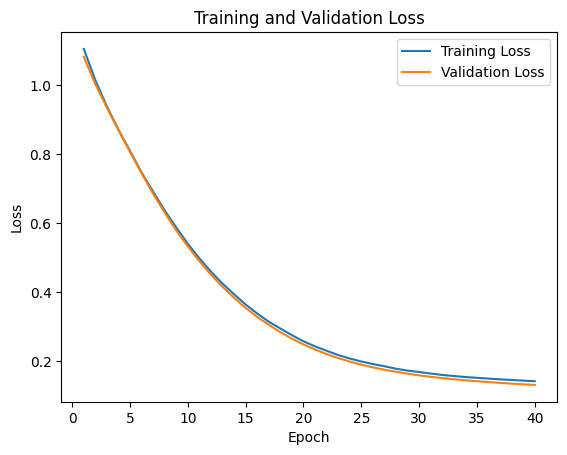

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
trained_params = batch_gradient_descent(jax_loss_fn, initial_params, training_data, val_data, learning_rate=1e-3, num_epochs=40, batch_size=8)

Traçons les valeurs prédites contre les valeurs réelles afin d’évaluer qualitativement les performances de notre modèle.

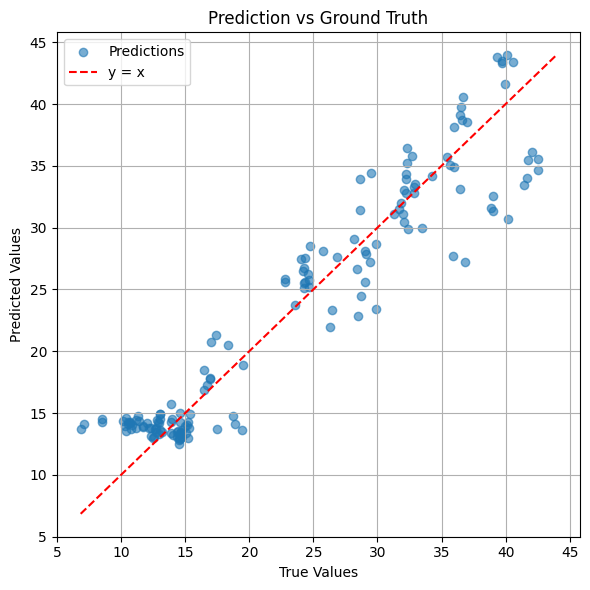

In [ ]:
# @title Helper function -- plot predictions
def plot_predictions(params, data, y_scaler):
  """Plot the predicted vs true values to qualitatively evaluate our model
  Args:
    params:
      trained model parameters
    data:
      tuple (X, y) of the data
    y_scaler:
      data preprocessing function to apply inverse transforms
  """

  X, y_scaled = data
  y_true = y_scaler.inverse_transform(y_scaled)

  y_pred_scaled = model.apply(params, X)
  y_pred = y_scaler.inverse_transform(y_pred_scaled)

  plt.figure(figsize=(6, 6))
  plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
  min_val = min(np.min(y_true), np.min(y_pred))
  max_val = max(np.max(y_true), np.max(y_pred))

  # Plot the reference line y = x
  plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.title('Prediction vs Ground Truth')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

plot_predictions(trained_params, val_data, y_scaler)

Le graphique fournit une indication visuelle de la performance de notre modèle. Idéalement, tous les points devraient se situer sur la ligne de référence rouge $y = x$, qui représente des prédictions parfaites. Nous observons que certains points sont proches de cette ligne, tandis que d'autres en s'écartent significativement. Cela suggère qu'il y a encore une marge d'amélioration dans la capacité de notre modèle à faire des prédictions précises.

Dans la section suivante, nous explorerons des métriques quantitatives pour évaluer plus précisément les performances du modèle.

**Métriques d'évaluation**

En apprentissage automatique, nous optimisons une fonction de perte, mais celle-ci n’est généralement pas une mesure directe de la performance de notre modèle. Ainsi, pour évaluer la performance réelle de notre modèle entraîné, nous mesurons habituellement d’autres métriques après l’entraînement.

Pour notre tâche de régression, mesurons le coefficient de détermination, appelé $\text{R-carré}$, défini mathématiquement comme suit :

$$
R^2 = 1 - \frac{\sum\left(y - \hat{y}\right)^2}{\sum\left(y - \bar{y}\right)^2},
$$

où $y$, $\hat{y}$ et $\bar{y}$ représentent respectivement les valeurs réelles, prédites et la moyenne des valeurs réelles.

- $R^2 = 1$ : indique une prédiction parfaite. Nous souhaitons que notre $R^2$ soit aussi proche que possible de 1.
- $R^2 = 0$ : pas mieux que de prédire simplement la moyenne.
- $R^2 < 0$ : modèle médiocre, performance pire que de prédire uniquement la moyenne.

**Tâche de code** : complétez la fonction ci-dessous pour calculer le coefficient de détermination $R^2$ de notre modèle.


In [ ]:
# @title You code here -- r^2
def rsquare(params: Dict[str, jnp.array], data: tuple):
  X, y = data
  # complete this code

  # update me
  pred = ... # apply the model for prediction

  r2 =

  return r2

In [ ]:
# @title Sample solution -- r^2. (Try not to peek until you've given it a good try!')
def rsquare(params: Dict[str, jnp.array], data: tuple):
  X, y = data

  pred = model.apply(params, X)

  top = jnp.sum((y - pred)**2)
  bottom = jnp.sum((y -jnp.mean(y))**2)

  r2 = 1 - top/(bottom + 1e-12) # to avoid division by zero
  return r2

Calculons le coefficient de détermination ($R^2$) de notre modèle sur notre jeu de données de validation.

In [ ]:
r2 = rsquare(trained_params, val_data)
print(f"R-squared value is {r2:.2f}")

R-squared value is 0.90


Félicitations, nous venons d’entraîner un modèle d’apprentissage automatique implémenté avec JAX pour prédire la quantité d’énergie nécessaire pour chauffer et refroidir un bâtiment en fonction de sa conception structurelle.

**Défi à emporter :**
- Êtes-vous satisfait du coefficient de détermination ($R^2$) de votre modèle?
- Avez-vous des suggestions pour améliorer ce modèle?

# **Conclusion**

**Résumé:**  
- L'apprentissage automatique est la science qui utilise les données pour construire des systèmes intelligents.  
- L'apprentissage profond est un sous-ensemble des méthodes d'apprentissage automatique qui utilise des réseaux de neurones.  
- L’optimisation est le processus qui consiste à trouver les paramètres minimisant la perte d'une fonction.  
- JAX est un framework récent et populaire permettant de calculer des dérivées et d’entraîner des modèles d’apprentissage automatique.  
- JAX combine Autograd et XLA pour effectuer des calculs numériques **accélérés** 🚀.  
- La fonction `grad` de JAX calcule automatiquement les gradients de vos fonctions !  
- La descente de gradient est un algorithme efficace pour entraîner des modèles d’apprentissage profond.  

**Prochaines étapes:**  

- Participez aux travaux pratiques sur l’apprentissage par renforcement pour découvrir une autre facette de l’apprentissage automatique.  
- Assistez à la prochaine session pratique sur les fondements de l’apprentissage automatique qui aura lieu après la conférence.  

**Références:**  

1. "Introduction and Motivation" de [Mathematics for Machine Learning par Marc Peter Deisenroth, A. Aldo Faisal, et Cheng Soon Ong (2020).](https://mml-book.github.io/)  
2. "Introduction" de [Dive into Deep Learning](https://d2l.ai/)  
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning  
4. Diverses documentations JAX [docs](https://jax.readthedocs.io/en/latest/) - en particulier [quickstart](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [common gotchas](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [random numbers](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) et [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).  
5. Travaux pratiques Indaba précédents - [Introduction to ML using JAX](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) et [Dive into Machine Learning: Learning by Implementing](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Intro_ML_English_Prac.ipynb).  

Pour d’autres travaux pratiques du Deep Learning Indaba, veuillez visiter [ici](https://github.com/deep-learning-indaba/indaba-pracs-2025).  



# **Retour d'expérience**

Nous serions ravis de recevoir vos retours afin d’améliorer nos travaux pratiques à l’avenir.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

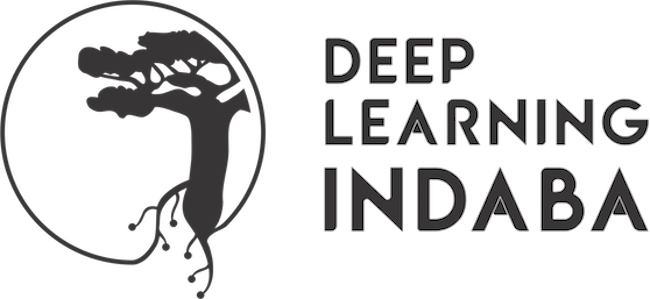